## Random Forest Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.
A Random Forest model with 113 trees yielded an accuracy of 81.21% when trained on slope data and precipitation and wind data over a 5 day period.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [41]:
df = pd.read_csv("dataset.csv")
len(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17808

In [43]:
df['severity'].value_counts()

medium        5594
small         2612
large          679
very_large     102
Name: severity, dtype: int64

In [42]:
df = df.query("(landslide == 0) | (landslide == 1 & (severity == 'medium' | severity == 'small' | severity == 'large' | severity=='very_large'))")
df

,Unnamed: 0,id,date,lat,lon,country,fatalities,injuries,type,trigger,...,ARI7,ARI6,ARI5,ARI4,ARI3,ARI2,ARI1,ARI0,slope,osm
0,0,1069,9/4/16,46.726906,13.787332,Austria,0.0,0.0,landslide,dam_embankment_collapse,...,2.976590,3.654591,1.058343,0.509419,0.896284,0.480223,0.240812,2.624868,22.012,433
1,1,1855,3/23/17,49.726406,-116.911834,Canada,0.0,0.0,mudslide,rain,...,2.492622,0.792003,1.980438,0.630716,0.318662,0.915588,0.546437,0.257236,34.101,445
2,2,797,10/20/09,18.534700,-72.409700,Haiti,4.0,0.0,landslide,downpour,...,5.497363,5.638706,3.951952,1.973113,1.409695,2.643286,4.717002,3.625811,25.380,672
4,4,13089,5/1/14,39.290200,-76.665100,United_States,0.0,0.0,mudslide,rain,...,0.044098,1.149294,0.760023,0.251724,1.122024,1.115725,9.222064,2.666510,0.000,3909
5,5,9036,7/12/13,36.262900,-115.615800,United_States,0.0,0.0,debris_flow,rain,...,0.504706,0.251684,1.435697,0.394314,0.186833,0.106178,0.523179,0.286147,4.063,3930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,22245,17836,9/22/11,7.540900,-82.659100,NaN,NaN,NaN,NaN,NaN,...,4.493989,5.745197,3.058807,1.141890,2.618064,2.800256,1.154158,0.712405,0.000,6
17804,22246,15144,4/30/11,39.429500,34.088500,NaN,NaN,NaN,NaN,NaN,...,0.032862,3.579579,1.095954,0.447838,0.377586,1.312842,1.064443,1.170743,14.018,6
17805,22247,16613,11/15/19,4.743200,32.643400,NaN,NaN,NaN,NaN,NaN,...,0.289700,0.252853,0.630594,0.981392,1.151828,3.465756,1.940764,0.696374,29.115,6
17806,22248,19961,4/2/19,39.405500,-105.692100,NaN,NaN,NaN,NaN,NaN,...,0.638350,0.382398,0.648808,0.698512,2.685568,3.400111,1.788508,2.865115,3.254,5


In [44]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))

16489


In [45]:
df['severity'].value_counts()

medium        5594
small         2612
large          679
very_large     102
Name: severity, dtype: int64

In [47]:
X = df.copy()
y = []
types = set()
for idx, row in X.iterrows():
    if row.landslide == 0:
        y.append(0)
    elif row.severity == 'small':
        y.append(1)
    elif row.severity == 'medium':
        y.append(2)
    else:
        y.append(3)
    types.add(y[-1])
print(types)
columns=[]
for i in range(9, 4, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
columns.append('slope')
columns.append('forest2')
columns.append('osm')
X = X[columns]
X

{0, 1, 2, 3}


,humidity9,ARI9,humidity8,ARI8,humidity7,ARI7,humidity6,ARI6,humidity5,ARI5,slope,forest2,osm
0,88,2.954525,85,2.357272,88,3.107315,84,2.120214,85,3.331579,31.733,1,6908
1,71,0.994640,74,0.739977,65,0.417297,45,0.255307,53,0.447317,27.079,1,2155
2,96,0.611076,96,0.509335,97,0.366908,96,0.530697,96,0.834787,21.133,1,6019
3,99,1.412474,100,0.558111,98,0.542621,96,0.197061,95,0.108763,5.375,1,1787
4,79,1.256704,78,0.815675,78,2.847555,79,1.638172,78,1.509791,0.000,0,1156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16484,71,1.106465,89,4.535294,91,3.515380,90,4.636855,89,5.550054,1.072,1,415
16485,63,0.000000,93,0.000000,86,0.000000,63,0.000000,70,0.000000,5.095,0,45
16486,88,0.982017,95,1.564516,87,1.723723,98,5.345586,93,3.109618,20.450,1,17081
16487,42,0.000000,62,0.000000,63,0.529172,63,2.447418,66,1.299043,0.686,0,4180


## Scaling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Prediction

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
pred = model.predict(X_test)
print("ACCURACY:", accuracy_score(pred, y_test))

ACCURACY: 0.7019405700424499


In [51]:
best = 1
highest = 0

for i in range(85, 150, 2):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    score = round(accuracy_score(pred, y_test)*10000)/100
    print("n_estimators =", i, "  ACCURACY:", score)
    if score > highest:
        highest = score
        best = i
print("# of trees:", best, highest)

n_estimators = 85   ACCURACY: 70.35
n_estimators = 87   ACCURACY: 70.68
n_estimators = 89   ACCURACY: 70.71
n_estimators = 91   ACCURACY: 70.41
n_estimators = 93   ACCURACY: 70.01
n_estimators = 95   ACCURACY: 70.44
n_estimators = 97   ACCURACY: 70.56
n_estimators = 99   ACCURACY: 69.89
n_estimators = 101   ACCURACY: 70.01
n_estimators = 103   ACCURACY: 70.77
n_estimators = 105   ACCURACY: 69.92
n_estimators = 107   ACCURACY: 70.86
n_estimators = 109   ACCURACY: 70.29
n_estimators = 111   ACCURACY: 70.47
n_estimators = 113   ACCURACY: 70.47
n_estimators = 115   ACCURACY: 70.25
n_estimators = 117   ACCURACY: 70.95
n_estimators = 119   ACCURACY: 69.47
n_estimators = 121   ACCURACY: 70.32
n_estimators = 123   ACCURACY: 70.19
n_estimators = 125   ACCURACY: 70.07
n_estimators = 127   ACCURACY: 70.35
n_estimators = 129   ACCURACY: 70.19
n_estimators = 131   ACCURACY: 70.44
n_estimators = 133   ACCURACY: 69.8
n_estimators = 135   ACCURACY: 70.16
n_estimators = 137   ACCURACY: 70.22
n_estimato

In [52]:
rf = RandomForestClassifier(n_estimators = best)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

0.7067919951485749


array([[1327,   24,  133,    0],
       [  96,  128,  302,    1],
       [ 156,   87,  872,    2],
       [  24,    5,  137,    4]])

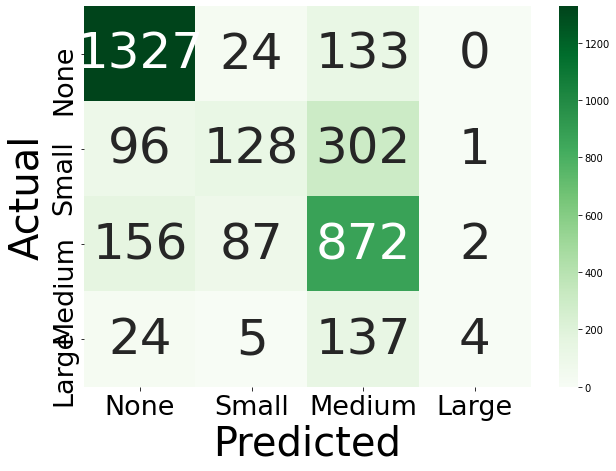

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary=False
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("severity RF Matrix")

plt.show()